# NaCl Nulceation Rates

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.signal import savgol_filter
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["computer modern roman"],
    "font.size": 25})

plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

def mscatter(x,y,ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

In [2]:
#https://doi.org/10.1039/D1CP02093E
Lamas_seeded = pd.DataFrame([[2.16, 0], [2.7, 21], [3.24, 28]], columns=['S', 'J'])

In [3]:
#https://doi.org/10.1039/D1CP02093E NPT and NVT
Lamas_bruteforce_NPT = pd.DataFrame([[3.92, 30.85], [3.98, 31.04], [4.05, 31.48]], columns=['S', 'J'])
Lamas_bruteforce_NVT = pd.DataFrame([[3.78, 30.78], [3.92, 31.0], [4.05, 31.08]], columns=['S', 'J'])

In [4]:
#https://doi.org/10.1039/D1CP02093E
Jiang_FFS = pd.DataFrame([[2.16, -7.12], [2.7, 19.07], [3.24, 27.33], [4.16, 30.64]], columns=['S', 'J'])

In [5]:
#https://doi.org/10.1039/D1CP02093E
Jiang_bruteforce_2018 = pd.DataFrame([[4.14, 31.27], [4.49, 32.29]], columns=['S', 'J'])

In [6]:
#https://aip.scitation.org/doi/full/10.1063/1.5084248
Jiang_MFPT = pd.DataFrame([[3.58, 31.07], [3.75, 31.33], [3.95, 31.55], [4.05, 31.63], [4.32, 31.85], [4.59, 32.23], [5, 32.64]], columns=['S', 'J'])

In [7]:
#https://doi.org/10.1039/D1CP02093E
Lanaro_bruteforce = pd.DataFrame([[4.22, 30.64]], columns=['S', 'J'])

In [8]:
# https://doi.org/10.1039/D1FD00089F
Finney_MSM = pd.DataFrame([[3.7, 31.54]], columns=['S', 'J'])              

In [9]:
#https://academic.oup.com/pnasnexus/article/1/2/pgac033/6556021?login=true
Bulutoglu_MFPT = pd.DataFrame([[4.05, 28.75]], columns=['S', 'J'])   

In [10]:
# https://aip.scitation.org/doi/10.1063/1.5024009
Zimmerman_seeded = pd.DataFrame([[2.16, 28.14], [2.7, 31.63], [3.24, 33.9]], columns=['S', 'J'])
Zimmerman_CN4 = pd.DataFrame([[2.16, 12.68], [2.7, 17.97], [3.24, 25.92]], columns=['S', 'J'])
Zimmerman_CN5 = pd.DataFrame([[2.16, 24.21], [2.7, 27.55], [3.24, 30.52]], columns=['S', 'J'])
Zimmerman_CN1 = pd.DataFrame([[2.16, -7.3], [2.7, -0.93], [3.24, 12.87]], columns=['S', 'J'])

In [11]:
# https://pubs.acs.org/doi/10.1021/acs.jctc.9b00795
Karmakar_wtmetad = pd.DataFrame([[2.59, 9.4], [3.14, 20.79]], columns=['S', 'J'])

In [12]:
#https://doi.org/10.1039/D1CP02093E
Desarnaud_xpt = pd.DataFrame([[1.6, -2.42]], columns=['S', 'J'])
Gao_xpt = pd.DataFrame([[2.4, 19.58]], columns=['S', 'J'])
Na_xpt = pd.DataFrame([[2.3, 14.62]], columns=['S', 'J'])

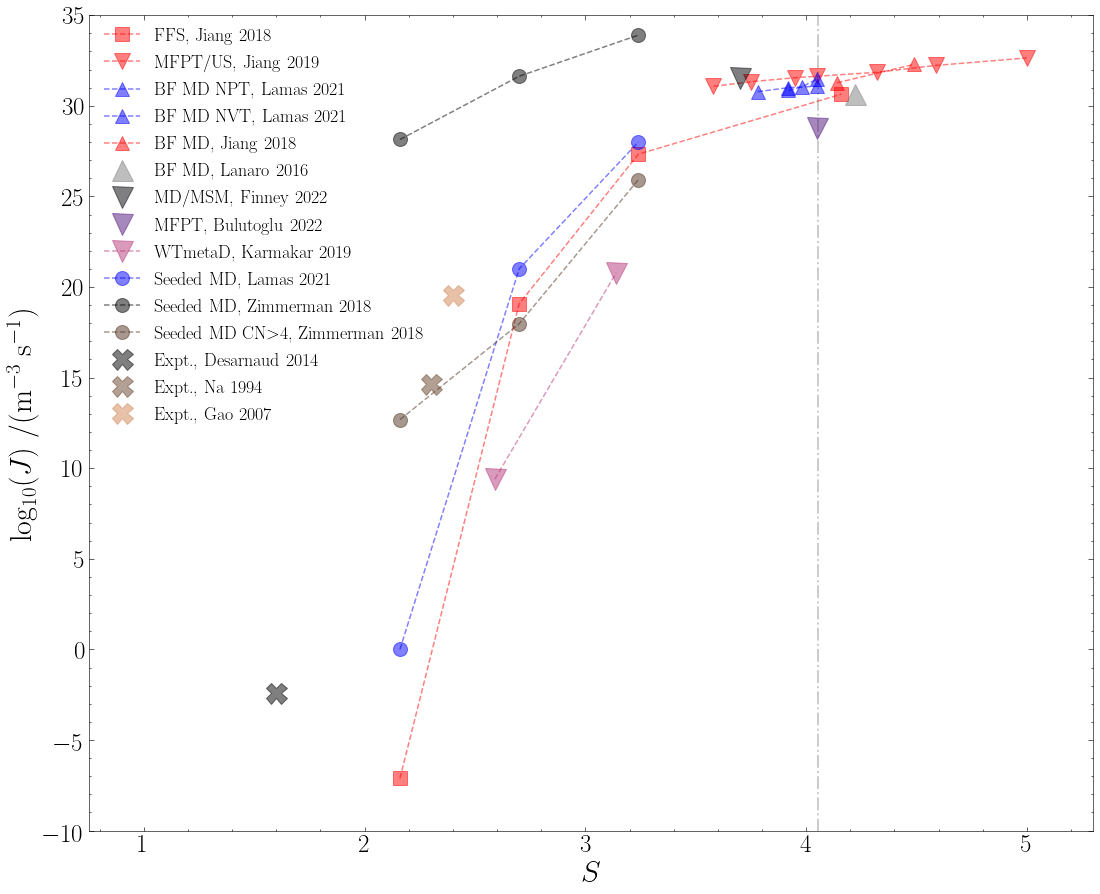

In [43]:
msp=14

fig,ax = plt.subplots(1,1,figsize=(18,15))
ax.plot([4.054, 4.054], [-20,50],"k-.",linewidth=2,alpha=0.2)

Jiang_FFS.plot(ax=ax, x="S", y = "J", label='FFS, Jiang 2018', legend = False, style="rs--", ms=msp, alpha=0.5) 
Jiang_MFPT.plot(ax=ax, x="S", y = "J", label='MFPT/US, Jiang 2019', legend = False, style="rv--", ms=1.1*msp, alpha=0.5) 

Lamas_bruteforce_NPT.plot(ax=ax, x="S", y = "J", label='BF MD NPT, Lamas 2021', legend = False, style="b^--", ms=msp, alpha=0.5) 
Lamas_bruteforce_NVT.plot(ax=ax, x="S", y = "J", label='BF MD NVT, Lamas 2021', legend = False, style="b^--", ms=msp, alpha=0.5) 
Jiang_bruteforce_2018.plot(ax=ax, x="S", y = "J", label='BF MD, Jiang 2018', legend = False, style="r^--", ms=msp, alpha=0.5) 
Lanaro_bruteforce.plot(ax=ax, x="S", y = "J", label='BF MD, Lanaro 2016', legend = False, style="C7^", ms=1.5*msp , alpha=0.5) 

color=iter(cm.magma(np.linspace(0,1,5)))
Finney_MSM.plot(ax=ax, x="S", y = "J", label='MD/MSM, Finney 2022', legend = False, style="v", ms=1.5*msp, alpha=0.5, c=next(color)) 
Bulutoglu_MFPT.plot(ax=ax, x="S", y = "J", label='MFPT, Bulutoglu 2022', legend = False, style="v", ms=1.5*msp, alpha=0.5, c=next(color)) 
Karmakar_wtmetad.plot(ax=ax, x="S", y = "J", label='WTmetaD, Karmakar 2019', legend = False, style="v--", ms=1.5*msp, alpha=0.5, c=next(color))

Lamas_seeded.plot(ax=ax, x="S", y = "J", label='Seeded MD, Lamas 2021', legend = False, style="bo--", ms=msp , alpha=0.5) 

color=iter(cm.copper(np.linspace(0,1,5)))

Zimmerman_seeded.plot(ax=ax, x="S", y = "J", label='Seeded MD, Zimmerman 2018', legend = False, style="o--", ms=msp , c=next(color),alpha=0.5) 
#Zimmerman_CN5.plot(ax=ax, x="S", y = "J", label='Seeded MD CN$>$5, Zimmerman 2018', legend = False, style="o--", ms=msp, c=next(color), alpha=0.5)
Zimmerman_CN4.plot(ax=ax, x="S", y = "J", label='Seeded MD CN$>$4, Zimmerman 2018', legend = False, style="o--", ms=msp, c=next(color), alpha=0.5) 
#Zimmerman_CN1.plot(ax=ax, x="S", y = "J", label='Seeded MD CN$>$1, Zimmerman 2018', legend = False, style="o--", ms=msp, c=next(color), alpha=0.5) 

color=iter(cm.copper(np.linspace(0,1,4)))
Desarnaud_xpt.plot(ax=ax, x="S", y = "J", label='Expt., Desarnaud 2014', legend = False, style="X", ms=1.5*msp, c=next(color), alpha=0.5) 
Na_xpt.plot(ax=ax, x="S", y = "J", label='Expt., Na 1994', legend = False, style="X", ms=1.5*msp , c=next(color), alpha=0.5) 
Gao_xpt.plot(ax=ax, x="S", y = "J", label='Expt., Gao 2007', legend = False, style="X", ms=1.5*msp , c=next(color), alpha=0.5) 

ax.set_ylim(-10,35)
ax.set_xlim(0.75,5.3)
ax.legend(loc='lower right', bbox_to_anchor=(0.35, 0.48),frameon=False, fontsize=18)
ax.set_xlabel(r'$S$',fontsize=30)
ax.set_ylabel(r'log$_{10}(J)$ /(m$^{-3}$ s$^{-1}$)',fontsize=30)
plt.savefig('rates.png', dpi=600, bbox_inches='tight',transparent=True)

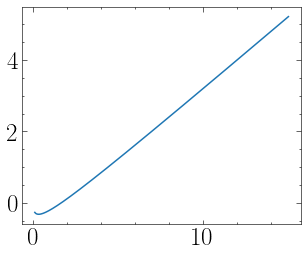

In [14]:
molal = np.linspace(0.1,15,1000)
a = 0.568
b = 1.17769
c = 0.177157

log_gamma = -(a*np.sqrt(molal))/(1+b*np.sqrt(molal)) + c*molal
gamma = 10**log_gamma

plt.plot(molal,np.log(gamma))

In [15]:
mu_ref = -391.6
kT = 8.314462618*298.15/1000
#kT = 2.5

In [16]:
mu = mu_ref + 2*kT*np.log(molal) + 2*np.log(gamma)

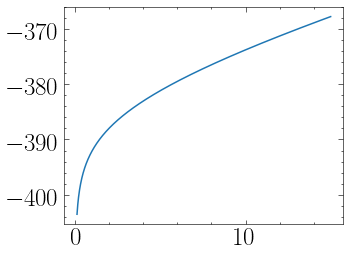

In [17]:
plt.plot(molal,mu)

In [18]:
msat = 3.7
msat_ind = np.abs(molal - msat).argmin()
mu_solid = mu[msat_ind]
print(molal[msat_ind],mu_solid)

3.694494494494495 -383.647195656746


In [19]:
x_axis = np.array([0.092, 0.15, 0.29])

In [20]:
supersaturation = 1/np.sqrt(x_axis)
Delta_mu = supersaturation*kT

In [21]:
mu_ions = 2*Delta_mu + mu_solid

In [22]:
for i in range(0,len(mu_ions)):
    molal_ind = np.abs(mu - mu_ions[i]).argmin()
    print(x_axis[i],molal[molal_ind])

0.092 15.0
0.15 12.36006006006006
0.29 9.496396396396397
